# Introduction

Dans le monde de la cinématographie, pour définir qui est l’acteur principale il faut obligatoirement regarder le film. Parfois on peut avoir plusieurs personnes qui apparaissent en même temps, pour cette raison on a choisit de travailler sur un projet qui pourrai nous aider à faire une analyse beaucoup plus pousser dans le but de déterminer les personnages principaux et leurs relations dans un film.

Notre analyse va consister à déterminer la ou les personnes qui apparaissent le plus dans un film. Pour aller beaucoup plus en profondeur, cette analyse va également établir la relation entre les différents personnages dans une seule scène. Cette analyse poussée a pour objectif de pouvoir faire une analyse objective d’un film sans même avoir à le regarder et en nous faire gagner beaucoup temps tout en sachant qu’une analyse subjective a tout aussi son importance dans le monde cinématographique.

# Présentation des données


Notre script est donc constitué de 289 scenes, et vu que ces données sont sous format textuelles, on a du procéder au nettoyage et preprocessing pour arriver à une table exploitable. Voici les étapesqui nous ont permis d'avoir un jeu de données utilisable :




1.   Lister les noms et prénoms des personnages
2.   Découper le script par scènes
3.   Une fonction qui va balayer les scenes en comptant le nombre d'occurences de chaque personnage


La table qui constitue la base de données de notre projet est celle-ci :

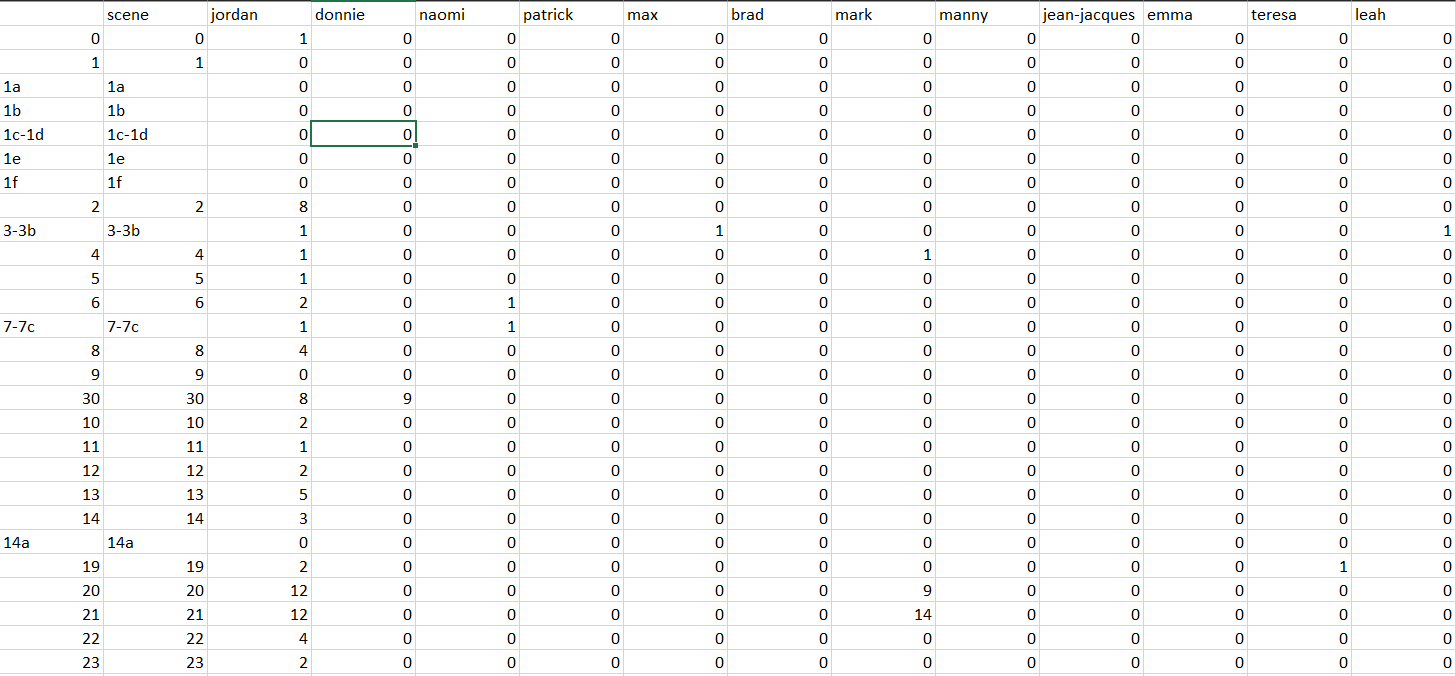

L'image que vous voyez ci-dessus ne constitue qu'une infime partie du jeu de données car une table avec 33 personnages et 289 scènes peut etre assez dure a representer en une fois.

Ce processus de nettoyage de données a été fait par l'utilisation de python. 
Voici la structuration de notre code : 
    • Importation de la bibliothèque Pandas pour pouvoir gérer les données qu’on va introduire. 
    •  On a lu le document txt (document qui contient la totalité du script)
     on a ensuite divisé le dit document en différentes scènes.
    • Pour pouvoir identifier les personnages qui apparaissent dans chaque scènes, on a également importé un document qui contient le nom de tous les personnages qu’on a ensuite divise en utilisant la fonction split.
    • Mettre les personnages dans une liste et celles-ci ont été enregistré en minuscule. 
    • Créer une liste vide de scenario. 
    • Pour enfin avoir le nombre de personnages dans chaque scènes, on a repérer les lignes qui commence les scènes afin de pouvoir compter le nombre de fois que chaque personnages apparait dans la scène.

In [ ]:
from copy import copy
import pandas as pd



content = open("wows.txt", "r").read().lower()
content = content.split("\n")


personnages = open("characters.txt", "r").read()
personnages = personnages.split("\n")
characters = []
for pers in personnages:
    p = pers.lower().split(" as ")[-1].split(" ")
    characters.append(p)
characters



per_dict_empty = {"scene" : 0}
for p in characters:
    per_dict_empty[p[0]] = 0



data={}
per_dict_full = copy(per_dict_empty)
scene = 0
scenes_content = {}
current_scene = ""
for line in content:
    words = line.split(" ")
    if line[0].isdigit():
        past_scene = copy(scene)
        scenes_content[past_scene] = current_scene
        current_scene = copy(line)
        data[past_scene] = per_dict_full
        data[past_scene]["scene"] = past_scene
        per_dict_full = copy(per_dict_empty)
        scene = words[0]
    else:
        current_scene = current_scene + " " + line
    past_char = ""
    for word in words:
        if word not in past_char:
            for char in characters:
                if word in char:
                    per_dict_full[char[0]] = per_dict_full[char[0]] + 1
                    past_char = copy(char)





pd.DataFrame(data).T
scenes_content

'6 int. jordan’s estate - master bedroom - day (feb ‘95) 6 we see naomi, 24, blonde and gorgeous, a living wet dream in laperla lingerie. jordan (v.o.) my wife, naomi, the duchess of bay ridge, brooklyn, a former model and miller lite girl. naomi licks her lips; she’s incredibly, painfully hot. jordan (v.o.) yeah, she was the one blowing me in the ferrari, so put your dick back in your pants. over the following, we see a quick'

# Lire les données

In [ ]:
import pandas as pd
data=pd.read_csv("scenes.csv",sep=',')
data.set_index('scene',inplace=True)
data

,Unnamed: 0,jordan,donnie,naomi,patrick,max,brad,mark,manny,jean-jacques,...,nicholas,janet,jerry,peter,waiter,agent,lucas,rochelle,samantha,dwayne
scene,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1a,1a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1b,1b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1c-1d,1c-1d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236a,236a,0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237,237,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,245,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
del data['Unnamed: 0']

In [ ]:
df=data!=0

# Méthode 1: ASSOCIATION RULES

Les règles d'association sont une technique d'analyse de données utilisée en apprentissage automatique et en exploration de données. Elles permettent d'identifier les relations entre différentes variables d'un ensemble de données. Plus précisément, elles cherchent à trouver des relations fréquentes entre différents éléments d'un ensemble de données

*   Support: fréquence d'un élément dans un texte
*   Confidence: fréquence d'un élement B selon un élément A
*   Lift: Le lift est une mesure de l'association entre deux items (ou produits) dans une règle d'association. Il est utilisé pour évaluer l'importance d'une règle d'association dans un ensemble de données. Le lift est calculé en comparant la fréquence observée d'une paire d'items à leur fréquence attendue si les deux items étaient indépendants. 

Un lift de 1 signifie que les deux items ne sont pas corrélés, c'est-à-dire qu'ils sont choisis indépendamment les uns des autres. Un lift supérieur à 1 indique que les items ont tendance à être choisis ensemble plus souvent que prévu par hasard, ce qui peut indiquer une association intéressante entre les items. Un lift inférieur à 1 indique une association négative, ce qui signifie que les items ont tendance à être choisis ensemble moins souvent que prévu par hasard.





In [ ]:
#Let’s select itemsets with a minimum of 1% Support
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df, min_support=0.01, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets.head(10)

,support,itemsets
0,0.723183,(jordan)
1,0.183391,(donnie)
2,0.179931,(naomi)
3,0.041522,(patrick)
4,0.041522,(max)
5,0.027682,(brad)
6,0.010381,(mark)
7,0.010381,(manny)
8,0.027682,(jean-jacques)
9,0.024221,(emma)


Jordan apparait à 72,3% dans le film

In [ ]:
from mlxtend.frequent_patterns import association_rules 
#basé sur la confidence avec un minimum de 0,2
assoc=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.2) # associate item
assoc.sort_values(by=['confidence'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
117,(hildy),"(naomi, donnie, jordan)",0.010381,0.048443,0.010381,1.000000,20.642857,0.009878,inf
49,"(max, donnie)",(jordan),0.010381,0.723183,0.010381,1.000000,1.382775,0.002874,inf
97,"(hildy, naomi)",(donnie),0.010381,0.183391,0.010381,1.000000,5.452830,0.008477,inf
91,(leah),"(max, jordan)",0.013841,0.041522,0.013841,1.000000,24.083333,0.013266,inf
89,"(jordan, leah)",(max),0.013841,0.041522,0.013841,1.000000,24.083333,0.013266,inf
...,...,...,...,...,...,...,...,...,...
35,(agent),(donnie),0.044983,0.183391,0.010381,0.230769,1.258345,0.002131,1.061592
96,"(donnie, naomi)",(hildy),0.048443,0.010381,0.010381,0.214286,20.642857,0.009878,1.259516
110,"(naomi, donnie, jordan)",(hildy),0.048443,0.010381,0.010381,0.214286,20.642857,0.009878,1.259516
114,"(naomi, donnie)","(hildy, jordan)",0.048443,0.010381,0.010381,0.214286,20.642857,0.009878,1.259516


Exemple de lecture: 83% des scènes contenant donnie ont aussi Jordan dedans.Tandis que 21% des scènes ayant Jordan ont Donnie dedans.

Donnie et Agent sont plus souvent dans les memes scènes que dans des scènes différentes

# Méthode 2:



# **La méthode TF-IDF est basée sur deux mesures statistiques :**

La méthode TF-IDF est une technique couramment utilisée en traitement de texte pour évaluer l'importance d'un mot dans un document. TF-IDF signifie « Term Frequency-Inverse Document Frequency », c'est-à-dire fréquence du terme-inverse de la fréquence des documents.

•	**La fréquence de terme (TF) :** le nombre de fois qu'un terme apparaît dans un document. Plus un terme apparaît fréquemment dans un document, plus il est important pour ce document.

•	**L'inverse de la fréquence de document (IDF)** : le nombre de documents dans le corpus qui contiennent le terme. Plus un terme est présent dans un grand nombre de documents, moins il est important pour un document en particulier.
La méthode TF-IDF combine ces deux mesures pour évaluer l'importance d'un terme dans un document. Pour chaque terme dans un document, la méthode calcule le produit de sa fréquence de terme (TF) et de son inverse de fréquence de document (IDF). Plus le produit est élevé, plus le terme est important pour le document.

La méthode TF-IDF peut être utilisée pour plusieurs tâches, comme la recherche d'informations, la classification de documents, la recommandation de contenu et l'analyse de sentiment. Elle est largement utilisée dans les moteurs de recherche pour classer les documents en fonction de leur pertinence par rapport à une requête donnée.


Formule TF-IDF:
\begin{equation}
  \text{tf-idf}(t, d, D) = \text{tf}(t, d) \cdot \text{idf}(t, D)
\end{equation}
Formule TF:
\begin{equation}
  \text{tf}(t, d) = \frac{n_{t,d}}{\ n_{d}}
\end{equation}


* n t,d : nombre d'occurence t dans le texte d    
* n d : nombre de mot dans le texte d  


Formule Standard IDF:
\begin{equation}
  \text{idf}(t, D) = \log{\frac{N}{df_t}}
\end{equation}
Formule SKlearn IDF:
\begin{equation}
  \text{idf}(t, D) = \log{\frac{1 + n}{1 + df_t}} + 1
\end{equation}
•	N : représente le nombre total de documents dans le corpus

•	DF(t) : représente le nombre de documents dans le corpus qui contiennent le terme t.

La méthode TF-IDF présente plusieurs avantages, notamment :
1.	Elle permet de donner plus de poids aux termes les plus importants pour un document et de réduire le poids des termes moins importants. Cela peut aider à améliorer la précision des résultats de recherche et de classification.
2.	Elle est relativement simple à implémenter et peut être appliquée à des corpus de taille variable.
3.	Elle est une méthode non supervisée, c'est-à-dire qu'elle ne nécessite pas de données d'entraînement préalables.
4.	Elle peut être adaptée pour tenir compte de la longueur des documents, en normalisant la fréquence du terme par rapport à la longueur du document.
5.	Elle peut être utilisée en combinaison avec d'autres techniques de traitement de texte pour améliorer les performances.
En résumé, la méthode TF-IDF est une technique efficace et largement utilisée pour évaluer l'importance des termes dans un document, ce qui peut aider à améliorer la précision des résultats de recherche et de classification. 


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

scenes = copy(scenes_content)
scenes = {key: scenes[key] for key in list(scenes.keys()) if key in list(df.index)}
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([scenes[s] for s in scenes])
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()
df_tfidf = pd.DataFrame(denselist, columns=feature_names)
df_tfidf = df_tfidf[[c[0] for c in characters if c[0] in df_tfidf.columns]]
df_tfidf.index = df.index
df_tfidf

,jordan,donnie,naomi,patrick,max,brad,mark,manny,emma,teresa,...,nicholas,janet,jerry,peter,waiter,agent,lucas,rochelle,samantha,dwayne
scene,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1a,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1b,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1c-1d,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1e,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236a,0.000000,0.172158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245,0.078777,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


On voit l'importance des personnages sur chaque scene, exemple Jordan es trés présent aux dernières scenes.

# Le réseau

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

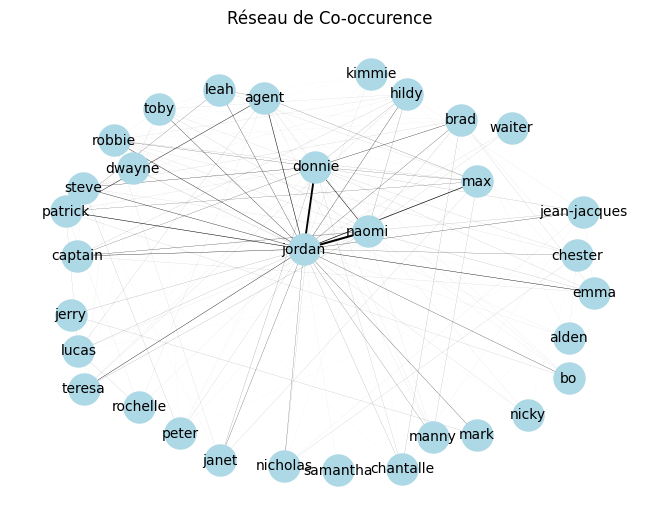

In [ ]:
# Créer un graphe vide
G = nx.Graph()

# Ajouter les nœuds
G.add_nodes_from(data.columns)

# Parcourir les lignes du DataFrame pour ajouter les arêtes avec leurs poids
for i, row in data.iterrows():
    for j in range(len(data.columns)):
        if row[j] > 0:
            for k in range(j+1, len(data.columns)):
                if row[k] > 0:
                    if G.has_edge(data.columns[j], data.columns[k]):
                        G[data.columns[j]][data.columns[k]]['weight'] += row[j] + row[k]
                    else:
                        G.add_edge(data.columns[j], data.columns[k], weight=row[j] + row[k])

# Dessiner le graphe
pos = nx.spring_layout(G, k=8, iterations=60)
weights = [G[u][v]['weight'] / 300 for u, v in G.edges()]
nx.draw(G, pos, node_color='lightblue', node_size=500, with_labels=True, font_size=10, width=weights)

# Afficher le graphe
plt.title("Réseau de Co-occurence")
plt.show()


On peut voir dans le graphe ci-dessus que Jordan, qui est le personnage principal, est au centre du réseau et qu'a mesure qu'on s'éloigne de lui, les personnages ont de moins en moins d'importance dans le film. les deux autres personnages les plus importants du film sont Naomi qui est sa deuxième femme et Donnie, qui est son collègue devenu meilleur ami.